# Modelo para encontrar o valor de uma casa

## Definindo o problema

Vamos colocar em prática tudo o que vimos até agora e criar nosso próprio modelo do zero, como fariamos em uma pesquisa ou no trabalho. O banco de dados que será utilizado está disponível em https://www.kaggle.com/datasets/harlfoxem/housesalesprediction e contém informações sobre casas a venda em King County, EUA. Nosso objetivo será criar um modelo que aprenda a precificar uma casa, com base nestas mesmas informações disponiveis.


A maior parte dos bancos de dados publicos tem um arquivo ou uma página com uma descrição sobre as colunas, abreviações, labels, e o que é necessário para compreender os dados. O Kaggle providencia uma pequena análise dos dados em seu site. Mas temos aqui também esta tabela para consulta:

| Variable      | Description |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| id            | código da casa  |
| date          | data da venda |
| price         | preço da casa  |
| bedrooms      | número de quartos |
| bathrooms     | número de banheiros (modelo americano) |
| sqft_living   | metragem quadrada da casa |
| sqft_lot      | metragem quadrada do terreno |
| floors        | total de andares da casa |
| waterfront    | casa com vista para o mar |
| view          | foi vista |
| condition     | quão boa é a condição geral |
| grade         | nota geral dada à unidade habitacional, com base no sistema de classificação de King County |
| sqft_above    | Metragem quadrada da casa sem contar o porão |
| sqft_basement | Metragem quadrada do porão |
| yr_built      | ano de construção |
| yr_renovated  | ano em que a casa foi reformada |
| zipcode       | código postal |
| lat           | coordenada de latitude |
| long          | coordenada de longitude |
| sqft_living15 | área da sala de estar em 2015 (implica algumas reformas) e isso pode ou não ter afetado a área do lote |
| sqft_lot15    | Área do lote em 2015 (implica algumas reformas)    


## Definindo nossa abordagem

### Possibilidades:

Dentro dos Modelos de Aprendizado de Máquina, podemos separar da seguinte forma:

<img src="https://www.gabo.de/wp-content/uploads/2020/02/Bereiche-des-Machine-Learnings.png">



*   **Aprendizagem Supervisionada**: modelo de aprendizado no qual o banco de dados disponibiliza a resposta para aquilo que estamos buscando aprender. Geralmente estes bancos de dados são feitos por especialistas da área ou casos reais.

    *   **Classificação**: o problema consiste em encontrar as separações de classes já predefinidas pelos dados, que serão encontradas se baseando nas caracteristicas similares. Ou seja, os dados serão agrupados de acordo com a posição e similaridade.
    *   **Regressão**: o objetivo é descrever uma função que descreva o mais próximo possível o comportamento dos dados, de forma a resposta que queremos obter para novos dados sejam possíveis resolvendo esta função.

*   **Aprendizagem não Supervisionada**: modelo de aprendizado no qual não conseguimos obter uma resposta dentro dos nossos dados durante o treinamento. Neste caso, a busca de padrões é diferente e é necessário outros métodos de validação, já que não é possível ter certeza absoluta sobre a resposta.
    *    **Clusterização**: nosso objetivo aqui é encontrar padrões nos dados e similaridades para ser possível separa-lo em conjuntos, geralmente de quantidade definida pelo programador de acordo com o problema e objetivo em questão. 






### Escolhendo finalmente: 

Observando os dados disponíveis pelo Kaggle, podemos ver que temos uma coluna de preços, que pode ser usada para o treinamento de um modelo de Aprendizado Supervisionado. Analisando mais um pouco nosso problema, vemos que a resposta que queremos obter é um valor numérico, sendo muito mais vantajoso utilizar um modelo de Regressão. (Utilizamos classificação nestes casos apenas se a resposta for em intervalos de valores ou classes como: popular, luxo, ...)

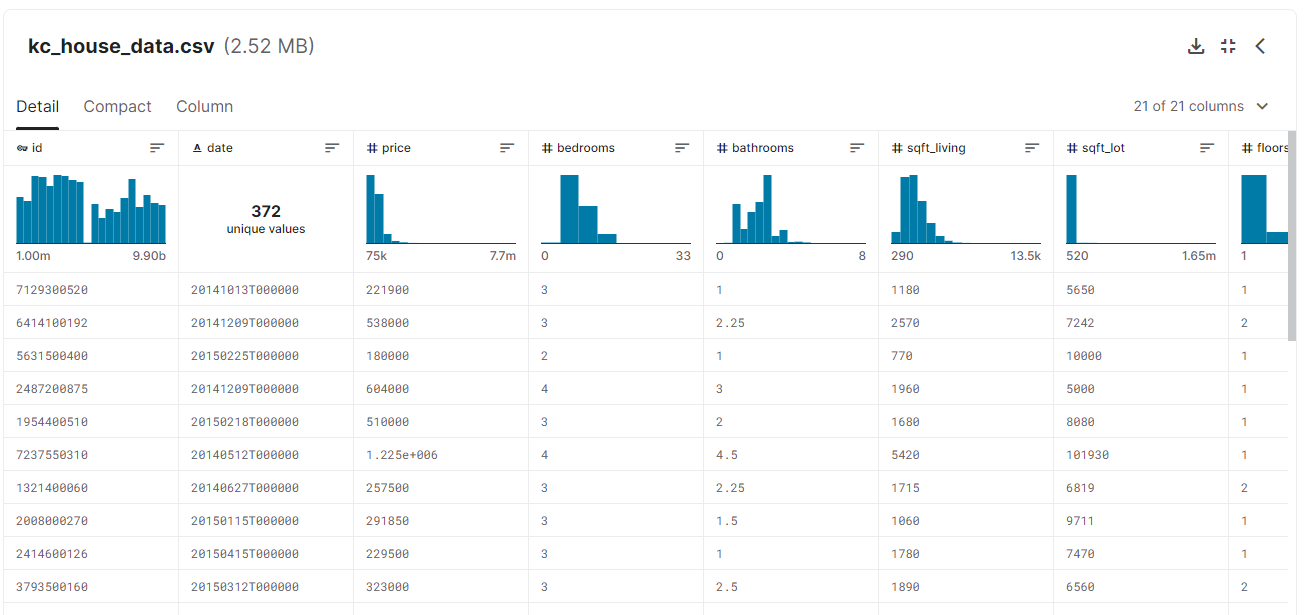



## Mãos à Obra!

In [41]:
!pip3 install scikit-learn --upgrade --user

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [42]:
#importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [43]:
#subindo a nossa base de dados
file_name='kc_house_data.csv'
df = pd.read_csv(file_name)

#exibindo a base de dados
display(df)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [44]:
# poedmos começar retirando a coluna de índice, já que não faz sentido incluir na função que estamos desenvolvendo
df.drop(['id'], axis=1, inplace = True)

In [45]:
#analisando a base de dados
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [46]:
#analisando as strings/object
df.describe(include=['object'])

,date
count,21613
unique,372
top,20140623T000000
freq,142


In [47]:
#vamos agora trabalhar nossos dados, primeiro encontrando os dados faltantes
print(df.isnull().any())

date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool


In [48]:
# analisando daddos "corrompidos"
colunas = df.columns
for col in colunas:
    print("number of NaN values for the column", col,":", df[col].isnull().sum())

number of NaN values for the column date : 0
number of NaN values for the column price : 0
number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0
number of NaN values for the column sqft_living : 0
number of NaN values for the column sqft_lot : 0
number of NaN values for the column floors : 0
number of NaN values for the column waterfront : 0
number of NaN values for the column view : 0
number of NaN values for the column condition : 0
number of NaN values for the column grade : 0
number of NaN values for the column sqft_above : 0
number of NaN values for the column sqft_basement : 0
number of NaN values for the column yr_built : 0
number of NaN values for the column yr_renovated : 0
number of NaN values for the column zipcode : 0
number of NaN values for the column lat : 0
number of NaN values for the column long : 0
number of NaN values for the column sqft_living15 : 0
number of NaN values for the column sqft_lot15 : 0


Se houvesse algum valor faltante, poderiamos remover a linha ou substituir pelo valor médio, utilizando a fórmula abaixo

```
mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)
```
Se os valores faltantes forem na variável alvo, no caso price, pode ser mais conveniente remover a linha, para deixar o resultado mais "puro". Também é importante ressaltar que não é interessante manter uma coluna com muitos valores faltando, comparado à quantidade total de dados, por mais que ela pareça influente para o problema.


In [49]:
# agora o próximo passo são analisar as strings, podemos encontra-las como 'objects' dentro do dataframe
df.dtypes

date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [50]:
# temos uma coluna como string: date (timestamp)
# precisamos então transformar ela em um valor categórico (intervalos/classes) ou numérico
# por sorte, para datas, como o ano nunca vai começar com zero, podemos manter a coluna como está e apenas remover parte dos dígitos
# tomar muito cuidado aqui, pois nisso pode não funcionar para todos os métodos

# convertemos para um outro formato
df['date'] = pd.to_datetime(df["date"]).dt.date
# exibimos a mudança
print("tabela após separar a data")
display(df['date'].head())
# e então formatamos e adicionamos na tabela
data = []
for item in df['date']:
    item = item.strftime("%Y%m%d")
    data.append(item)
df['date'] = data
print("tabela após formatação")
display(df['date'].head())
# e convertemos a coluna para o tipo inteiro
df['date'] = df['date'].astype(int)
print("tabela após conversão de tipos")
display(df['date'].head())

tabela após separar a data


0    2014-10-13
1    2014-12-09
2    2015-02-25
3    2014-12-09
4    2015-02-18
Name: date, dtype: object

tabela após formatação


0    20141013
1    20141209
2    20150225
3    20141209
4    20150218
Name: date, dtype: object

tabela após conversão de tipos


0    20141013
1    20141209
2    20150225
3    20141209
4    20150218
Name: date, dtype: int64

In [51]:
# vamos analisar então a correlação entre as variáveis para escolher o que vai para o nosso modelo
correl = df.corr()
correl

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
date,1.000000,0.003033,-0.010493,-0.027523,-0.029791,0.005599,-0.022550,-0.003798,0.001063,-0.046517,-0.031464,-0.024421,-0.016130,0.003248,-0.024070,0.001235,-0.029770,-0.000301,-0.022752,0.000154
price,0.003033,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,-0.010493,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,-0.027523,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.029791,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,0.005599,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,-0.022550,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.003798,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.001063,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.046517,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


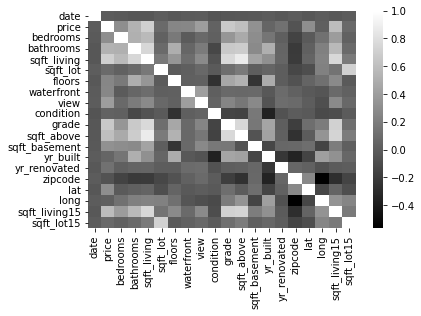

In [52]:
#vamos criar um mapa de calor para tentar observar melhor estass variáveis
sns.heatmap(correl, xticklabels=correl.columns, yticklabels=correl.columns, cmap="gray")

In [53]:
# podemos observar que a coluna date não tem uma boa correlação nem com nosso alvo, a coluna price, nem com as outras colunas
# podemos exclui-la para tentar uma modelagem mais precisa
df.drop(['date'], axis=1, inplace = True)

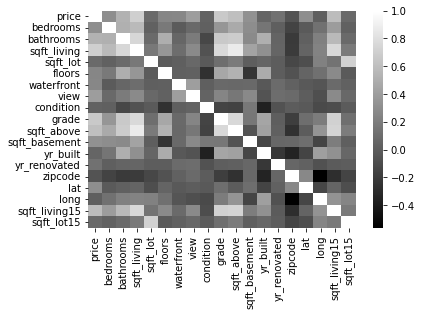

In [54]:
# observamos então agora como vai ficar
correl = df.corr()
sns.heatmap(correl, xticklabels=correl.columns, yticklabels=correl.columns, cmap="gray")

In [55]:
# existem outras colunas que poderiam ser excluidas e outras análises ainda de correlação para realizar
# mas como nossos dados não parecem muito ligados, vamos começar a preparar a regressão e depois, se necessário, fazer novos ajustes
# começamos então separando os nossos dados de treino (70%) e os dados de teste(30%)

linhas_tot = df.shape[0]
linhas_train = int(linhas_tot * 0.7)
linhas_test = linhas_tot - linhas_train

print("treinaremos com", linhas_train, "dados e testaremos com", linhas_test, "de um total de ", linhas_tot)

treinaremos com 15129 dados e testaremos com 6484 de um total de  21613


In [56]:
# vamos então separar nosso banco de dados
# como nossos dados não estão ordenados, podemos separar diretamente

df_train = df.iloc[0:linhas_train]
df_test = df.iloc[linhas_train:]
display(df_train)
display(df_test)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15124,555700.0,3,2.00,1810,12420,1.0,0,0,4,7,1810,0,1957,0,98008,47.5888,-122.127,2230,12330
15125,690000.0,4,2.50,3220,35400,2.0,0,0,3,9,3220,0,1991,0,98072,47.7547,-122.114,3050,35252
15126,449000.0,3,1.75,1660,9697,1.0,0,0,4,7,1660,0,1952,0,98155,47.7564,-122.286,2060,20624
15127,308500.0,2,1.00,850,6174,1.0,0,0,4,7,850,0,1950,0,98155,47.7352,-122.328,1100,6174


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15129,937750.0,4,2.75,2580,3560,1.5,0,0,5,7,1710,870,1917,0,98115,47.6753,-122.304,1980,3800
15130,725126.0,4,2.50,3200,12369,2.0,0,0,3,10,3200,0,1998,0,98059,47.5273,-122.143,3770,12960
15131,135000.0,3,1.00,840,3000,1.0,0,0,3,5,840,0,1943,0,98178,47.4940,-122.275,1010,6000
15132,635000.0,4,2.50,2970,7961,1.0,0,0,3,8,2020,950,1969,0,98125,47.7118,-122.290,1410,7959
15133,245500.0,2,1.00,790,7500,1.0,0,0,3,6,790,0,1950,0,98011,47.7644,-122.198,1970,8970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [57]:
# vamos pegar então o nome de todas as colunas, com exceção do preço
lista_col = list(df.columns) 
lista_col.remove('price')
print(lista_col) 

#definimos as variáveis preditoras
X = df_train[lista_col]
# definimos nossa variável alvo
Y = df_train['price']

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


In [58]:
# ou podemos fazer melhor, usar uma função que divide aleatoriamente a nossa base como desejamos
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df[lista_col], df["price"], test_size = 1/4, random_state = 0)

# criamos o objeto para armazenar a regressão linear
lm = LinearRegression()
# "fitamos"/encontramos aqui a nossa função
lm.fit(X_train,Y_train)
# e por fim vamos fazer um pequeno calculo para ver o quão bom nosso modelo ficou
lm.score(X_test, Y_test) #r2_score

0.6900932169857921

In [59]:
result_test =lm.predict(df_test[lista_col])
display(pd.DataFrame({
'Predicao':result_test,  
'Valor Real': df_test['price']}))

,Predicao,Valor Real
15129,788733.789340,937750.0
15130,892934.749678,725126.0
15131,-22341.336257,135000.0
15132,744980.836157,635000.0
15133,343643.713406,245500.0
...,...,...
21608,485243.410561,360000.0
21609,439521.623992,400000.0
21610,151023.386308,402101.0
21611,379581.291831,400000.0


In [60]:
#podemos observar nossa fórmula final:
print(lm.intercept_)
print(lm.coef_)

3684410.887339228
[-3.28134561e+04  3.42534867e+04  1.10993677e+02  1.86700097e-01
  1.15805090e+04  6.12181593e+05  5.05786747e+04  2.72135161e+04
  9.42386044e+04  6.69979575e+01  4.39957188e+01 -2.56234116e+03
  2.17428983e+01 -5.48653975e+02  6.04734298e+05 -2.10508922e+05
  2.84199402e+01 -4.34516844e-01]
